<a href="https://colab.research.google.com/github/Hanaelhamrawy/DataAnalysis-Projects/blob/main/TitanicClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Classification**

---




## Develop a predictive system to determine a person's likelihood of surviving the Titanic sinking and investigate the influential factors contributing to survival.

# **Imports**

In [4]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
import pandas as pd
dataset = 'https://raw.githubusercontent.com/Hanaelhamrawy/DataAnalysis-Projects/main/Titanic-Dataset.csv'
df = pd.read_csv(dataset)

#  Please make sure to include the CSV file in the same directory or update the URL if necessary, for the project to run successfully.

# **Data Inspection**

In [5]:
#Display the top five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Dataset Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
# Missing values before cleaning
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# **Data Cleaning**

---



In [8]:
#Dropping the "Cabin" column due to its high number of missing values and limited relevance
df = df.drop(columns=['Cabin'])

# Replace missing values in the "Age" column with the mean age
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

# Fill missing values in the "Embarked" column with the mode value
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

# Missing values after cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# **Data Analysis**

# 1. Gender

---



Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


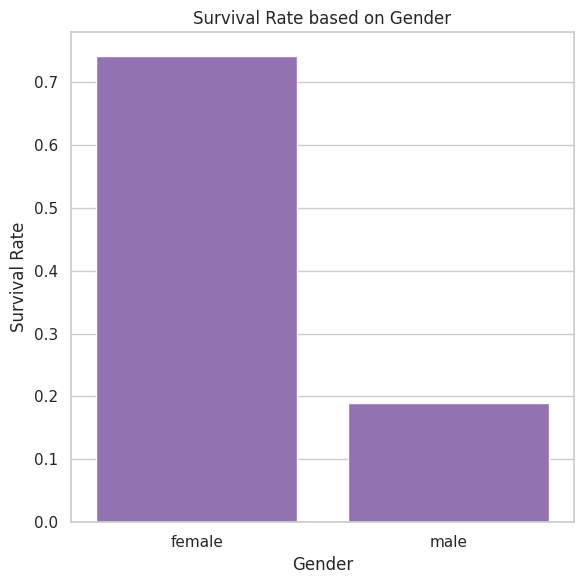

In [9]:
# Survival Rate based on Gender
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(survival_by_sex)

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, color='#9467bd')
plt.title('Survival Rate based on Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64


<Figure size 800x600 with 0 Axes>

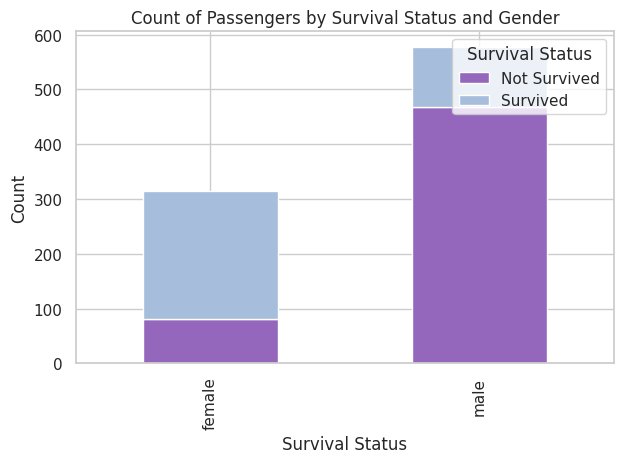

In [10]:
# Count of passengers who survived and did not survive based on Gender
survival_count_by_gender = df.groupby(['Sex', 'Survived']).count()
print(survival_count_by_gender['PassengerId'])

# Plot
colors = ['#9467bd', '#a6bddb']
plt.figure(figsize=(8, 6))
survival_count_by_gender['PassengerId'].unstack().plot(kind='bar', stacked=True, color=colors)
plt.title('Count of Passengers by Survival Status and Gender')
plt.ylabel('Count')
plt.xlabel('Survival Status')
plt.legend(['Not Survived', 'Survived'], title='Survival Status', loc='upper right')
plt.tight_layout()
plt.show()


# 2. Passenger Class

---

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


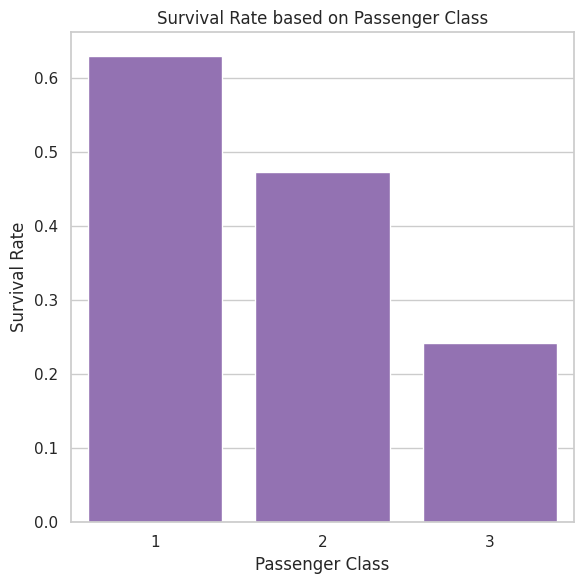

In [11]:
# Survival Rate based on Passenger Class
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
print(survival_by_pclass)

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values, color='#9467bd')
plt.title('Survival Rate based on Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.tight_layout()
plt.show()


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64


<Figure size 800x600 with 0 Axes>

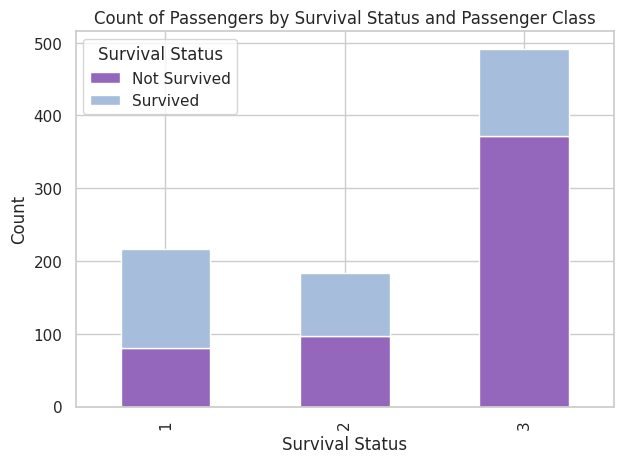

In [12]:
# Count of passengers who survived and did not survive based on Passenger Class
survival_count_by_pclass = df.groupby(['Pclass', 'Survived']).count()
print(survival_count_by_pclass['PassengerId'])

# Plot
colors = ['#9467bd', '#a6bddb']
plt.figure(figsize=(8, 6))
survival_count_by_pclass['PassengerId'].unstack().plot(kind='bar', stacked=True, color=colors)
plt.title('Count of Passengers by Survival Status and Passenger Class')
plt.ylabel('Count')
plt.xlabel('Survival Status')
plt.legend(['Not Survived', 'Survived'], title='Survival Status', loc='upper left')
plt.tight_layout()
plt.show()


# 3. Age

---



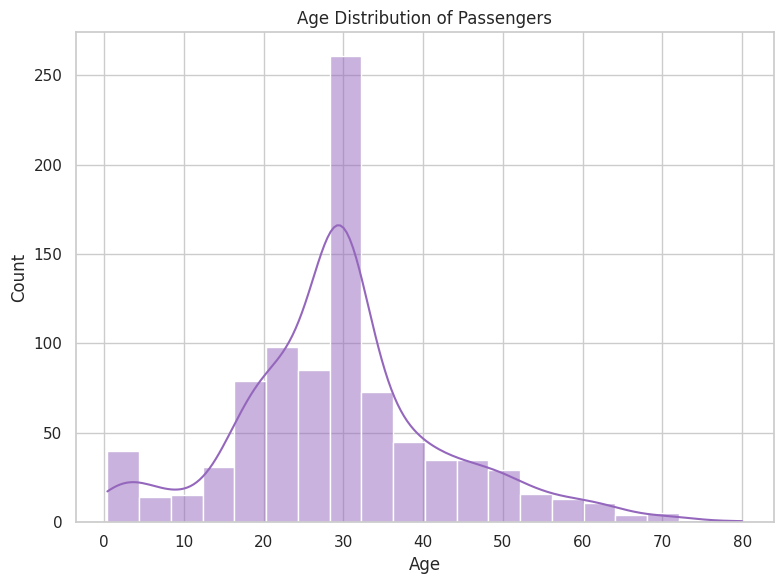

In [13]:
#Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='#9467bd')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

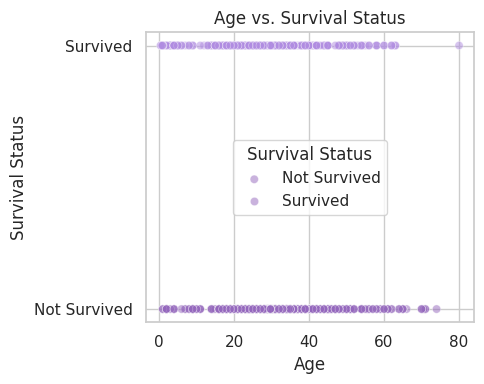

In [14]:
# Survival Rate based on Age
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Age', y='Survived', data=df, hue='Survived', palette=['#9467bd', '#b08ce1'], marker='o', alpha=0.5)
plt.title('Age vs. Survival Status')
plt.xlabel('Age')
plt.ylabel('Survival Status')
plt.yticks([0, 1], ['Not Survived', 'Survived'])
plt.legend(['Not Survived', 'Survived'], title='Survival Status', loc='center')
plt.tight_layout()
plt.show()


# **Data Preprocessing**

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding for two columns ('Sex' and 'Embarked')
df['S_encoded'] = label_encoder.fit_transform(df['Sex'])
df['E_encoded'] = label_encoder.fit_transform(df['Embarked'])
print(df[['Sex', 'S_encoded', 'Embarked', 'E_encoded']].head())

      Sex  S_encoded Embarked  E_encoded
0    male          1        S          2
1  female          0        C          0
2  female          0        S          2
3  female          0        S          2
4    male          1        S          2


In [16]:
# Select X and Y
X = df[['Pclass', 'S_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'E_encoded']]
Y = df['Survived']

# Display X and Y
print("X (Features):")
print(X.head())
print("\nY (Target):")
print(Y.head())

X (Features):
   Pclass  S_encoded   Age  SibSp  Parch     Fare  E_encoded
0       3          1  22.0      1      0   7.2500          2
1       1          0  38.0      1      0  71.2833          0
2       3          0  26.0      0      0   7.9250          2
3       1          0  35.0      1      0  53.1000          2
4       3          1  35.0      0      0   8.0500          2

Y (Target):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [17]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



# Display
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (712, 7)
Y_train shape: (712,)
X_test shape: (179, 7)
Y_test shape: (179,)


# **Data Modelling**


In [18]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Classifiers
svc_clf = SVC(random_state=42)
nb_clf = GaussianNB()
rf_clf = RandomForestClassifier(random_state=42)

# SVC Accuracy
svc_clf.fit(X_train, Y_train)
svc_pred = svc_clf.predict(X_test)
svc_accuracy = accuracy_score(Y_test, svc_pred)
print("SVC Accuracy:", svc_accuracy)

# Gaussian Naive Bayes Accuracy
nb_clf.fit(X_train, Y_train)
nb_pred = nb_clf.predict(X_test)
nb_accuracy = accuracy_score(Y_test, nb_pred)
print("Gaussian Naive Bayes Accuracy:", nb_accuracy)

# Random Forest Accuracy
rf_clf.fit(X_train, Y_train)
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)


SVC Accuracy: 0.659217877094972
Gaussian Naive Bayes Accuracy: 0.776536312849162
Random Forest Accuracy: 0.8100558659217877


In [19]:
from sklearn.model_selection import cross_val_score

# Scoring Metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Classifiers
classifiers = [svc_clf, nb_clf, rf_clf]
classifier_names = ['SVC', 'Gaussian Naive Bayes', 'Random Forest']

# Cross Validation
for clf, clf_name in zip(classifiers, classifier_names):
    print(clf_name + " Cross-Validation Scores:")
    for metric in scoring_metrics:
        scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring=metric)
        print(metric.capitalize() + ": {:.3f}".format(scores.mean()))
    print()


SVC Cross-Validation Scores:
Accuracy: 0.667
Precision: 0.676
Recall: 0.239
F1: 0.350

Gaussian Naive Bayes Cross-Validation Scores:
Accuracy: 0.793
Precision: 0.728
Recall: 0.720
F1: 0.724

Random Forest Cross-Validation Scores:
Accuracy: 0.787
Precision: 0.727
Recall: 0.701
F1: 0.712



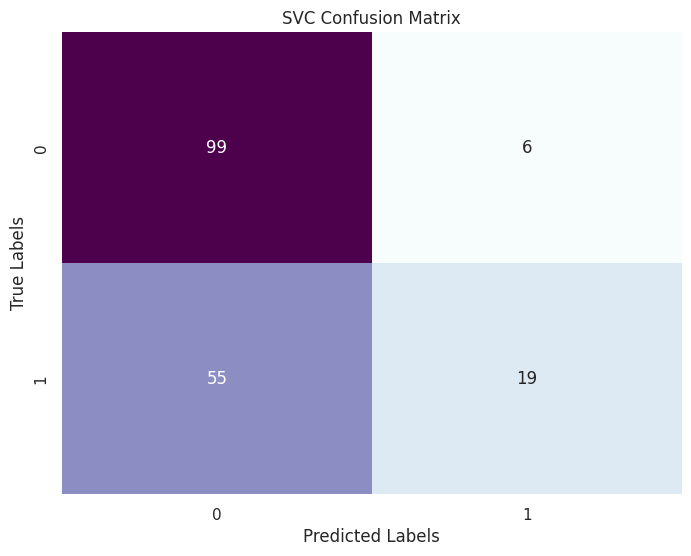

SVC Accuracy on Training Set: 0.6699438202247191
SVC Accuracy on Testing Set: 0.659217877094972



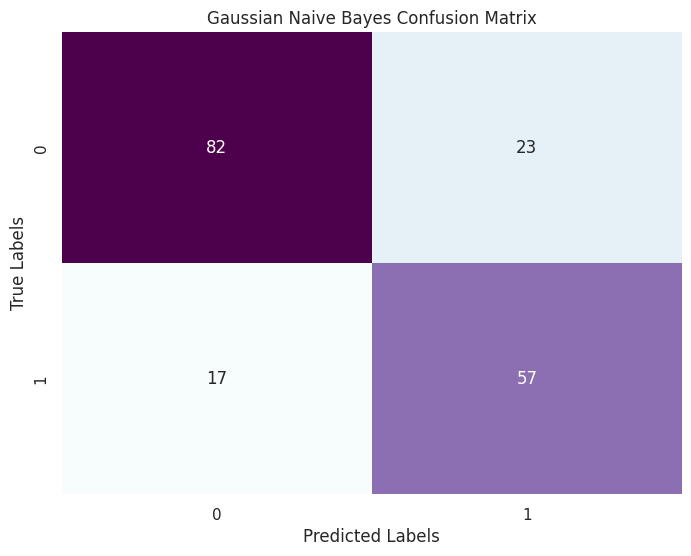

Gaussian Naive Bayes Accuracy on Training Set: 0.7991573033707865
Gaussian Naive Bayes Accuracy on Testing Set: 0.776536312849162



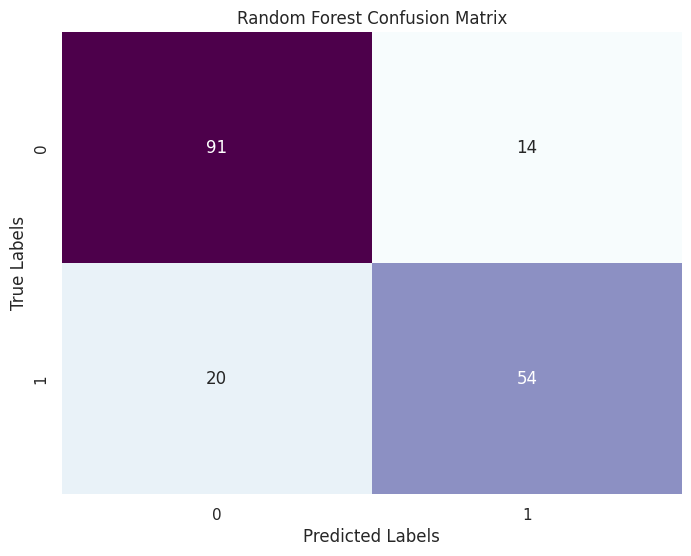

Random Forest Accuracy on Training Set: 0.9803370786516854
Random Forest Accuracy on Testing Set: 0.8100558659217877



In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train and evaluate each classifier
for clf, clf_name in zip(classifiers, classifier_names):
    clf.fit(X_train, Y_train)
    Y_pred_train = clf.predict(X_train)
    accuracy_train = accuracy_score(Y_train, Y_pred_train)

# Calculate accuracy
    Y_pred_test = clf.predict(X_test)
    accuracy_test = accuracy_score(Y_test, Y_pred_test)

# Calculate confusion matrix
    cm = confusion_matrix(Y_test, Y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", cbar=False)
    plt.title(clf_name + ' Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    print(clf_name + " Accuracy on Training Set:", accuracy_train)
    print(clf_name + " Accuracy on Testing Set:", accuracy_test)
    print()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame containing the Titanic dataset

# Define features (X) and target variable (y)
X = df[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Sex', 'Embarked']]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#  Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train Random Forest classifier pipeline
rf_pipeline.fit(X_train, y_train)

# Predict based on input data
example_input = pd.DataFrame([[25, 1, 0, 7.25, 3, 'male', 'S']], columns=['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Sex', 'Embarked'])
rf_prediction = rf_pipeline.predict(example_input)
print("Random Forest Prediction:", "Survived" if rf_prediction[0] == 1 else "Not Survived")


Random Forest Prediction: Not Survived
